Use R kernel

In [ ]:
library(cvms)
library(mgcv)
library(lmvar)
library(groupdata2)
library(dplyr)
library(gamclass)
library(lme4)
library(merTools)
library(stargazer)

## Gaze duration modeling

In [ ]:
BASE_DIR <- 'bccwj_surprisals/'
set.seed(42)
control = lmerControl(optCtrl=list(maxfun=100000))

for (file in list.files(BASE_DIR, pattern="surprisal.csv", recursive=T)){
    print(file)
    data <- read.csv(paste(BASE_DIR, file, sep=""), header=T)
    data$screenN = scale(data$screenN)
    data$lineN = scale(data$lineN)
    data$segmentN = scale(data$segmentN)
    data$length = scale(data$length)
    data$length_prev_1 = scale(data$length_prev_1)
    data$log_gmean_freq = scale(data$log_gmean_freq)
    data$log_gmean_freq_prev_1 = scale(data$log_gmean_freq_prev_1)
    data$surprisals_sum = scale(data$surprisals_sum)

    rt_linear <- lmer(time ~ log_gmean_freq*length + log_gmean_freq_prev_1*length_prev_1 + screenN + lineN + segmentN +(1|article) + (1|subj), data = data, REML=FALSE)
    rt_linear_logLik <- logLik(rt_linear)
    rt_linear_surprisal <- lmer(time ~ surprisals_sum + log_gmean_freq*length + log_gmean_freq_prev_1*length_prev_1 + screenN + lineN + segmentN +(1|article) + (1|subj), data = data, REML=FALSE)
    rt_linear_surprisal_logLik <- logLik(rt_linear_surprisal)
    chi_p = anova(rt_linear, rt_linear_surprisal)$Pr[2]
    
    out <- paste(BASE_DIR, paste(gsub("/[^/]+$", "", file), "/logLik.txt", sep=""), sep="")
    if (file.exists(out)){
        file.remove(out)
    }
    file.create(out, showWarnings = TRUE)
    write(paste("delta_linear_fit_logLik: ", rt_linear_surprisal_logLik - rt_linear_logLik), file=out, append=T)
    write(paste("linear_fit_chi_p: ", chi_p), file=out, append=T)
}

In [ ]:
BASE_DIR <- './dundee_surprisals/'
set.seed(42)
control = lmerControl(optCtrl=list(maxfun=100000))

for (file in list.files(BASE_DIR, pattern="surprisal.tsv", recursive=T)){
    data <- read.table(paste(BASE_DIR, file, sep=""), header=T, sep="\t")
    data$screenN = scale(data$screenN)
    data$lineN = scale(data$lineN)
    data$segmentN = scale(data$segmentN)
    data$length = scale(data$length)
    data$length_prev_1 = scale(data$length_prev_1)
    data$gmean_freq_prev_1 = scale(data$log_gmean_freq_prev_1)
    data$log_gmean_freq = scale(data$log_gmean_freq)
    data$log_gmean_freq_prev_1 = scale(data$log_gmean_freq_prev_1)
    data$surprisals_sum = scale(data$surprisals_sum)
    data$surprisals_sum_prev_1 = scale(data$surprisals_sum_prev_1)
    data$surprisals_sum_prev_2 = scale(data$surprisals_sum_prev_2)

    print(file)
    rt_linear <- lmer(time ~ log_gmean_freq*length + log_gmean_freq_prev_1*length_prev_1 + screenN + lineN + segmentN + (1|article) + (1|subj), data = data, REML=FALSE)
    rt_linear_logLik <- logLik(rt_linear)
    rt_linear_surprisal <- lmer(time ~ surprisals_sum + surprisals_sum_prev_1 + surprisals_sum_prev_2 + log_gmean_freq*length + log_gmean_freq_prev_1*length_prev_1 + screenN + lineN + segmentN + (1|article) + (1|subj), data = data, REML=FALSE)
    rt_linear_suprisal_logLik <- logLik(rt_linear_surprisal)
    chi_p = anova(base_linear, surprisal_linear)$Pr[2]

    out <- paste(BASE_DIR, paste(gsub("/[^/]+$", "", file), "/logLik.txt", sep=""), sep="")
    if (file.exists(out)){
        file.remove(out)
    }
    file.create(out, showWarnings = TRUE)
    write(paste("delta_linear_fit_logLik: ", rt_linear_surprisal_logLik - rt_linear_logLik), file=out, append=T)
    write(paste("linear_fit_chi_p: ", chi_p_linear), file=out, append=T)
}

## Uniformity

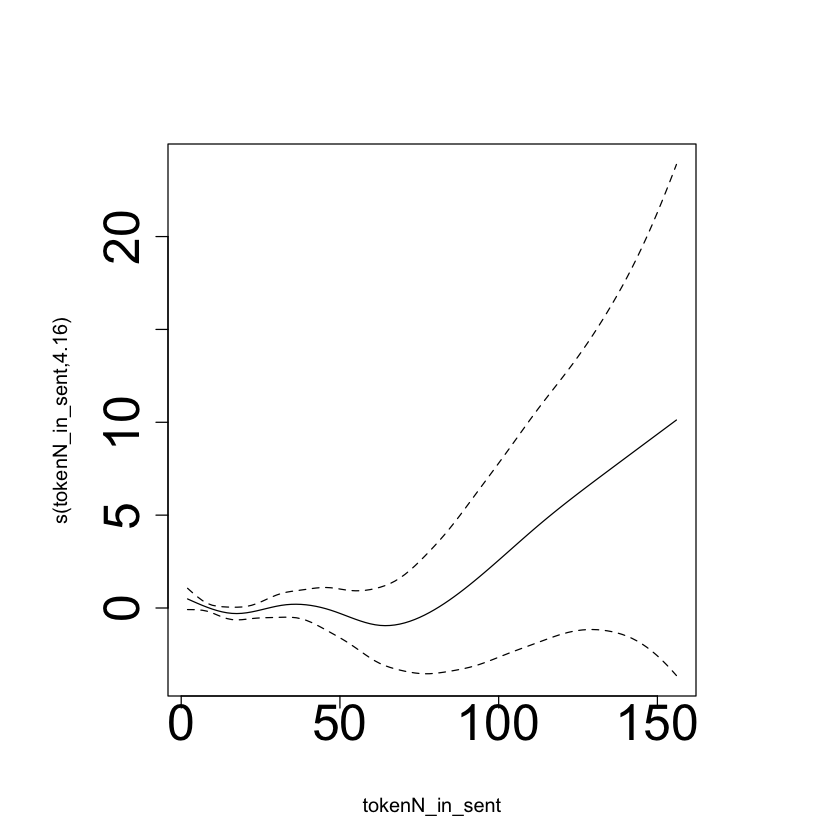

In [33]:
data <- read.table('dundee_surprisals/trans-lg/lg-seed-1/100_updates/surprisal.tsv', header=T, sep="\t")

base_mod_non_linear <- gam(time ~ s(tokenN_in_sent, bs="cr", k=10), data = data, REML=FALSE)

par(mar=c(6, 7, 6, 6), mgp=c(4, 1, 0)) 
plot(base_mod_non_linear,
    cex.axis=2.5)

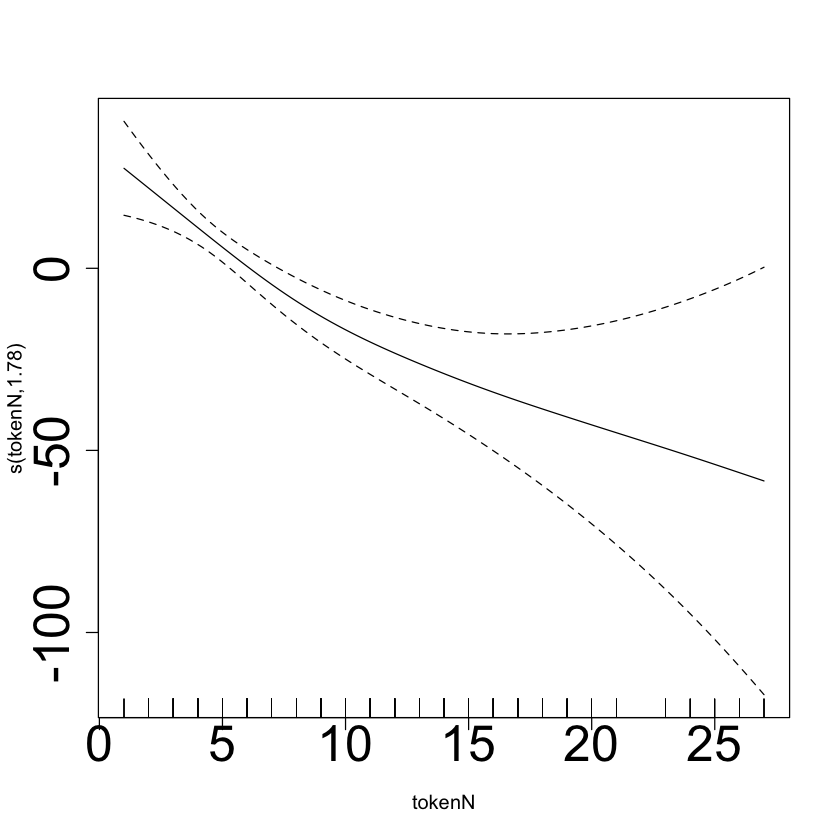

In [35]:
data <- read.csv('bccwj_surprisals/trans-lg/lg-seed-1/100000_updates/surprisal.csv', header=T)
base_non_linear <- gam(time ~ s(tokenN, bs="cr", k=20), data = data, REML=FALSE)
plot(base_non_linear, cex.axis=2.5)

## Analysis

In [30]:
BASE_DIR <- 'bccwj_surprisals/'
set.seed(42)
control = lmerControl(optCtrl=list(maxfun=100000))

for (file in list.files(BASE_DIR, pattern="surprisal.csv", recursive=T)){
    data <- read.csv(paste(BASE_DIR, file, sep=""), header=T)
    data <- data[!duplicated(data$surprisals_sum,),]
    data$screenN = scale(data$screenN)
    data$lineN = scale(data$lineN)
    data$segmentN = scale(data$segmentN)
    data$length = scale(data$length)
    data$length_prev_1 = scale(data$length_prev_1)
    data$log_gmean_freq = scale(data$log_gmean_freq)
    data$log_gmean_freq_prev_1 = scale(data$log_gmean_freq_prev_1)
    data$surprisals_sum = scale(data$surprisals_sum)
    surprisal_linear <- lm(surprisals_sum ~ log_gmean_freq*length + sentN + tokenN, data = data)

    out <- paste(BASE_DIR, paste(gsub("/[^/]+$", "", file), "/feature_effect.txt", sep=""), sep="")
    if (file.exists(out)){
        file.remove(out)
    }

    for (f in c('WLSPLUWA','WLSPLUWB','anti_locality')){
        surprisal_linear_feature <- lm(formula = paste("surprisals_sum ~", as.character(f), "+ log_gmean_freq*length + sentN + tokenN"), data = data)
        write(paste(as.character(f),(logLik(surprisal_linear_feature)-logLik(surprisal_linear))), file=out, append=T)
    }
}